In [1]:
%%time
%matplotlib inline

import pandas as pd
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
random.seed(42)

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

CPU times: user 601 ms, sys: 162 ms, total: 763 ms
Wall time: 826 ms


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%%time
df = pd.read_csv('/Users/christopherpan 1/Desktop/All_Data/Train_Test_Set3/train_1_600_rnd3.csv',sep="|")

CPU times: user 758 ms, sys: 58.8 ms, total: 817 ms
Wall time: 828 ms


In [3]:
%%time
df.shape

CPU times: user 38 µs, sys: 8 µs, total: 46 µs
Wall time: 87.7 µs


(600, 6486)

In [4]:
df = df.drop(df.columns[0], axis = 1) 
df.drop(df.columns[0], axis = 1) 

,file_name,C2752075,C2752077,C2752078,C2752081,C2752086,C2752089,C2752147,C2752148,C2752151,...,C3266800,C3266812,C3266814,C3266816,C3266817,file_name_intagged,CUI,Old_Tag,Max_Tag,Avg_Tag
0,320,0,0,0,0,0,0,0,0,0,...,6,6,7,7,8,320,C0522224,0.340722,0.340722,0.340722
1,1245884-overview,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,1245884-overview,C0016658,0.358149,0.358149,0.292662
2,244082-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,244082-overview,C0022658,0.451807,0.451807,0.164761
3,794789-overview,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,794789-overview,C0042571,0.402176,0.402176,0.281783
4,193031-overview,0,0,0,0,0,0,0,0,0,...,8,8,9,9,9,193031-overview,C0543467,0.345770,0.345770,0.237174
5,23606,0,0,0,0,0,0,0,0,0,...,4,4,4,4,5,23606,C0013216,0.320083,0.320083,0.281327
6,1062235-overview,0,0,0,0,0,0,0,0,0,...,6,7,7,7,9,1062235-overview,C0011849,0.493290,0.493290,0.456743
7,24738,0,0,0,0,0,0,0,0,0,...,6,7,7,7,7,24738,C0019064,0.337582,0.337582,0.337582
8,95444-overview,0,0,0,0,0,0,0,0,0,...,7,7,7,9,9,95444-overview,C0038045,0.308301,0.308301,0.189647
9,27750,0,0,0,0,0,0,0,0,0,...,2,3,3,4,5,27750,C0497327,0.531273,0.531273,0.388607


In [5]:
type(df.columns[9])

str

In [6]:
print(len(df.columns))

6485


In [7]:
%%time
df['Max_Tag'].describe()

CPU times: user 5.07 ms, sys: 1.92 ms, total: 6.98 ms
Wall time: 5.26 ms


count    600.000000
mean       0.207418
std        0.114129
min       -0.032693
25%        0.123443
50%        0.190950
75%        0.281427
max        0.613265
Name: Max_Tag, dtype: float64

CPU times: user 201 ms, sys: 7.18 ms, total: 208 ms
Wall time: 216 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a09b46da0>]],
      dtype=object)

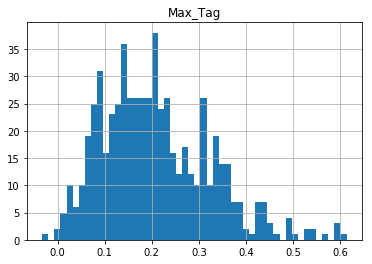

In [8]:
%%time
df.hist(column='Max_Tag', bins=50)

In [9]:
%%time
df.isnull().values.any()

CPU times: user 15.4 ms, sys: 5.94 ms, total: 21.4 ms
Wall time: 14.4 ms


False

In [10]:
%%time
print('y <= 0.00       : ',len(df[(df['Max_Tag']<=0)]), 100*len(df[(df['Max_Tag']<=0)])/17248.0)
print('0.00 < y <= 0.05: ',len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)]), 100*len(df[(df['Max_Tag']>0) & (df['Max_Tag']<=0.05)])//600.0)
print('0.05 < y <= 0.10: ',len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)]), 100*len(df[(df['Max_Tag']>0.05) & (df['Max_Tag']<=0.10)])/600.0)
print('0.10 < y <= 0.20: ',len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)]), 100*len(df[(df['Max_Tag']>0.1) & (df['Max_Tag']<=0.20)])/600.0)
print('0.20 < y <= 0.30: ',len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)]), 100*len(df[(df['Max_Tag']>0.2) & (df['Max_Tag']<=0.30)])/600.0)
print('0.30 < y <= 0.40: ',len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)]), 100*len(df[(df['Max_Tag']>0.3) & (df['Max_Tag']<=0.40)])/600.0)
print('0.40 < y <= 0.50: ',len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)]), 100*len(df[(df['Max_Tag']>0.4) & (df['Max_Tag']<=0.50)])/600.0)
print('0.50 < y <= 0.60: ',len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)]), 100*len(df[(df['Max_Tag']>0.5) & (df['Max_Tag']<=0.60)])/600.0)
print('0.60 < y <= 0.70: ',len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)]), 100*len(df[(df['Max_Tag']>0.6) & (df['Max_Tag']<=0.70)])/600.0)
print('0.70 < y <= 0.80: ',len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)]), 100*len(df[(df['Max_Tag']>0.7) & (df['Max_Tag']<=0.80)])/600.0)
print('0.80 < y <= 0.90: ',len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)]), 100*len(df[(df['Max_Tag']>0.8) & (df['Max_Tag']<=0.90)])/600.0)
print('0.90 < y <= 1.00: ',len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)]), 100*len(df[(df['Max_Tag']>0.9) & (df['Max_Tag']<=1)])/600.0)
print('1.00 < y <= 1.10: ',len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)]), 100*len(df[(df['Max_Tag']>1) & (df['Max_Tag']<=1.1)])/600.0)

y <= 0.00       :  1 0.005797773654916512
0.00 < y <= 0.05:  25 4.0
0.05 < y <= 0.10:  87 14.5
0.10 < y <= 0.20:  200 33.333333333333336
0.20 < y <= 0.30:  152 25.333333333333332
0.30 < y <= 0.40:  101 16.833333333333332
0.40 < y <= 0.50:  25 4.166666666666667
0.50 < y <= 0.60:  8 1.3333333333333333
0.60 < y <= 0.70:  1 0.16666666666666666
0.70 < y <= 0.80:  0 0.0
0.80 < y <= 0.90:  0 0.0
0.90 < y <= 1.00:  0 0.0
1.00 < y <= 1.10:  0 0.0
CPU times: user 78.4 ms, sys: 20.3 ms, total: 98.7 ms
Wall time: 97.3 ms


In [11]:
df['Bin_tag'] = (df['Max_Tag'] > 0.3)
df['Bin_tag'].astype(object).replace({False:'0',True:'1'})

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
570    0
571    0
572    0
573    0
574    0
575    0
576    0
577    0
578    0
579    0
580    0
581    0
582    0
583    1
584    0
585    0
586    0
587    0
588    0
589    0
590    0
591    0
592    0
593    0
594    0
595    1
596    0
597    0
598    0
599    0
Name: Bin_tag, Length: 600, dtype: object

In [12]:
clean_frame_train = df.drop(['file_name','file_name_intagged', 'CUI', 'Max_Tag','Avg_Tag','Old_Tag'], axis=1, inplace=False)

In [13]:
from sklearn.model_selection import train_test_split

y = clean_frame_train.Bin_tag
#X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train_2, y, stratify = true, test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split(clean_frame_train, y, test_size=0.20)

X_tr = X_train.drop(['Bin_tag'], axis=1)
X_vl = X_valid.drop(['Bin_tag'], axis=1)

X_tr = X_tr.drop(X_tr.columns[0], axis = 1).as_matrix()
X_vl = X_vl.drop(X_vl.columns[0], axis = 1).as_matrix()

y_tr = y_train.astype(object).replace({False:'0',True:'1'}).as_matrix()
y_vl = y_valid.astype(object).replace({False:'0',True:'1'}).as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [14]:
print(X_tr)

[[0 0 0 ... 9 9 9]
 [0 0 0 ... 8 8 8]
 [0 0 0 ... 9 9 9]
 ...
 [0 0 0 ... 8 9 9]
 [0 0 0 ... 8 8 9]
 [0 0 0 ... 6 6 8]]


In [15]:
from sklearn.ensemble import RandomForestClassifier

regr = RandomForestClassifier(n_jobs=3, random_state=0)

regr.fit(X_tr,y_tr)
a = regr.predict(X_vl)
print(a)
score = regr.score(X_vl, y_vl)
print(score)

['1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
0.7166666666666667


In [24]:
b = regr.predict_proba(X_vl)
a = []
for probability in b:
    if probability[0].item() >= 0.8:
        a.append('0')
    else:
        a.append('1')

In [25]:
print(regr.score(X_vl,a))

0.6583333333333333


In [26]:
print(y_vl)

['0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '1' '0' '1' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0']


In [27]:
print(a)

['1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0']


In [28]:
results = [0,0,0,0]
#Format = (y_vl,y_pred in a): in results 0 is (0,0), 1 is (1,0), 2 is (0,1), 3 is (1,1) 
for i in range(120):
    if y_vl[i] == '0' and a[i] == '0':
        results[0] += 1
    elif y_vl[i] == '1' and a[i] == '0':
        results[1] += 1
    elif y_vl[i] == '0' and a[i] == '1':
        results[2] += 1
    elif y_vl[i] == '1' and a[i] == '1':
        results[3] += 1

In [29]:
#Format = (y_vl,y_pred in a): in results 0 is (0,0), 1 is (1,0), 2 is (0,1), 3 is (1,1) 
print('  0  1')
print('0 ' + str(results[0]) + ' ' + str(results[1]))
print('1 ' + str(results[2]) + ' ' + str(results[3]))

  0  1
0 57 13
1 36 14
